## Question 1: Use yfinance to Extract Stock Data

In [3]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_data = yf.download("TSLA")

# Reset index to use dates as DataFrame's main index
tesla_data = tesla_data.reset_index()

# Display the first five rows of tesla_data
tesla_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)

# Check for successful download
if response.status_code == 200:
    html_data = response.text
else:
    print(f"Error downloading data from {url}: {response.status_code}")
    html_data = None

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')  # Use 'html.parser' for modern HTML

tesla_table = soup.find_all("tbody")[1]

# Extract data into a DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tesla_table.find_all("tr")[1:]:  # Skip the header row
    cells = row.find_all("td")
    if len(cells) >= 2:  # Check for at least two cells (Date and Revenue)
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(',|\$', "")
tesla_revenue.dropna(subset=["Revenue"], inplace=True)  # Drop rows with missing revenue
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]  # Remove empty revenue strings

# Display the last five rows
tesla_revenue.tail()

,Date,Revenue
47,2010-09-30,$31
48,2010-06-30,$28
49,2010-03-31,$21
51,2009-09-30,$46
52,2009-06-30,$27


## Question 3: Use yfinance to Extract Stock Data

In [9]:
import yfinance as yf
import pandas as pd

# Download GameStop stock data
gme_data = yf.download("GME")

# Reset index to use dates as DataFrame's main index
gme_data = gme_data.reset_index()

# Display the first five rows of gme_data
gme_data.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-02-13,2.40625,2.51500,2.38125,2.51250,1.691666,76216000
1,2002-02-14,2.54375,2.54875,2.48125,2.50000,1.683251,11021600
2,2002-02-15,2.50000,2.50625,2.46250,2.48750,1.674834,8389600
3,2002-02-19,2.47500,2.47500,2.34375,2.38750,1.607504,7410400
4,2002-02-20,2.40000,2.46875,2.38125,2.46875,1.662209,6892800


## Question 4: Use Webscraping to Extract GME Revenue Data

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

# Check for successful download
if response.status_code == 200:
    html_data = response.text
else:
    print(f"Error downloading data from {url}: {response.status_code}")
    html_data = None

# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')  # Use 'html.parser' for modern HTML

gme_table = soup.find_all("tbody")[1]

# Extract data into a DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in gme_table.find_all("tr")[1:]:  # Skip the header row
    cells = row.find_all("td")
    if len(cells) >= 2:  # Check for at least two cells (Date and Revenue)
        date = cells[0].text.strip()
        revenue = cells[1].text.strip()
        gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(',|\$', "")
gme_revenue.dropna(subset=["Revenue"], inplace=True)  # Drop rows with missing revenue
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]  # Remove empty revenue strings

# Display the last five rows
gme_revenue.tail()

,Date,Revenue
56,2006-01-31,"$1,667"
57,2005-10-31,$534
58,2005-07-31,$416
59,2005-04-30,$475
60,2005-01-31,$709


## Question 5: Plot Tesla Stock Graph

[*********************100%%**********************]  1 of 1 completed


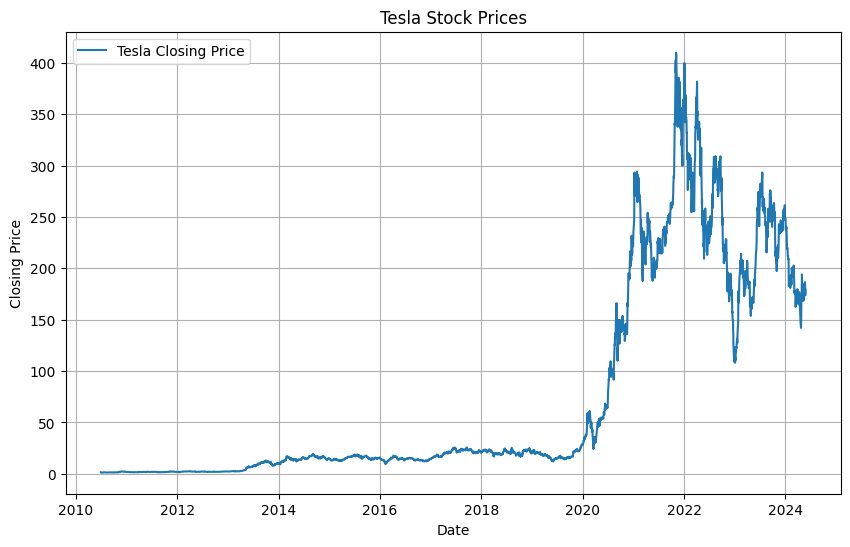

In [11]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla_data = yf.download("TSLA")

# Plot closing price
plt.figure(figsize=(10, 6))
plt.plot(tesla_data["Close"], label="Tesla Closing Price")
plt.title("Tesla Stock Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()


## Question 6: Plot GameStop Stock Graph

[*********************100%%**********************]  1 of 1 completed


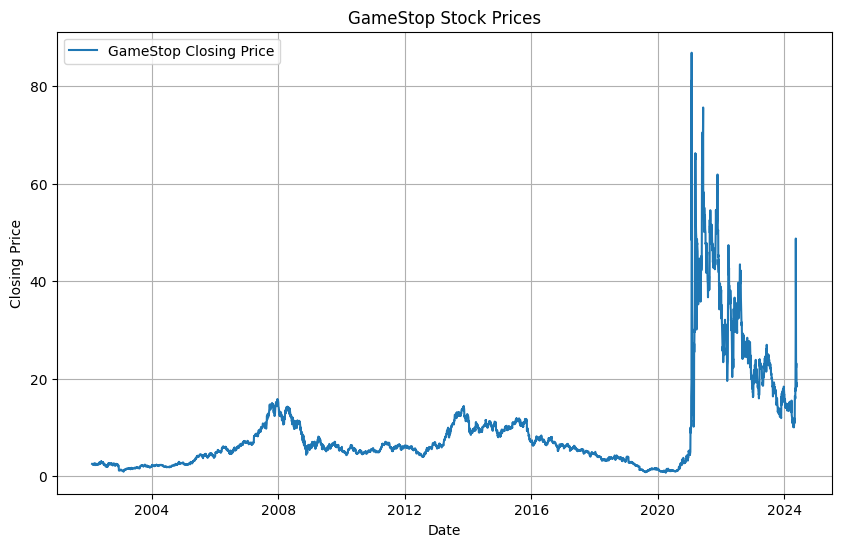

In [12]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data (if not already downloaded)
# You can comment out this line if you have downloaded GME data previously
gme_data = yf.download("GME")

# Plot closing price
plt.figure(figsize=(10, 6))
plt.plot(gme_data["Close"], label="GameStop Closing Price")
plt.title("GameStop Stock Prices")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)
plt.show()